<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_16_ensemble_046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
print(sklearn.__version__)

1.3.2




### Problem of Class Imbalance

**Class imbalance** occurs when one class in a dataset significantly outnumbers the other classes. This is common in many real-world scenarios, such as fraud detection, medical diagnoses, and loan defaults. In such cases, the majority class (the more frequent class) dominates the dataset, while the minority class (the less frequent class) is underrepresented.

### Impact on Model Performance

When training a machine learning model on imbalanced data, the model tends to become biased towards the majority class. This bias can lead to the following issues:

1. **High Accuracy but Poor Minority Class Performance**: The model may achieve high overall accuracy by simply predicting the majority class most of the time. However, it will likely perform poorly on the minority class, failing to identify critical instances.

2. **High Precision and Recall for the Majority Class**: Precision and recall scores for the majority class may be high because the model is good at predicting the majority class correctly. However, this often comes at the expense of poor performance for the minority class.

3. **Low Precision and Recall for the Minority Class**: Precision and recall scores for the minority class are typically low because the model struggles to correctly identify minority class instances. This is problematic in scenarios where identifying the minority class correctly is crucial (e.g., detecting fraudulent transactions or diagnosing diseases).

### Checking for Class Imbalance Issues

To check for the impact of class imbalance on model performance, you can:

1. **Analyze Class Distribution**: Examine the distribution of classes in your dataset. If there is a significant imbalance, it indicates a potential issue.

2. **Evaluate Precision and Recall Scores**: Assess precision and recall scores for both the majority and minority classes. High precision and recall for the majority class and low scores for the minority class suggest that the model is biased towards the majority class.

3. **Confusion Matrix**: A confusion matrix provides a detailed breakdown of true positives, false positives, true negatives, and false negatives for each class. This helps in understanding how well the model performs on each class.

4. **F1 Score**: The F1 score, which is the harmonic mean of precision and recall, can be calculated for both classes. A low F1 score for the minority class indicates poor performance.

### Addressing Class Imbalance

To address class imbalance and improve model performance on the minority class, you can:

1. **Resampling Techniques**: Use techniques like oversampling (e.g., SMOTE) to increase the number of minority class instances, or undersampling to reduce the number of majority class instances.

2. **Class Weight Adjustment**: Adjust class weights in your model to give more importance to the minority class. This helps the model focus on learning to identify minority class instances better.

3. **Ensemble Methods**: Use ensemble methods like bagging and boosting, which can help improve the performance of models on imbalanced data.

4. **Threshold Tuning**: Adjust the decision threshold to balance precision and recall for the minority class.

By implementing these techniques, you can create more balanced models that perform well on both the majority and minority classes, leading to more reliable and accurate predictions.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import warnings
from loan_data_utils import load_and_preprocess_data, plot_class_distribution, plot_mean_class_metrics, get_top_performers, evaluate_model

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])


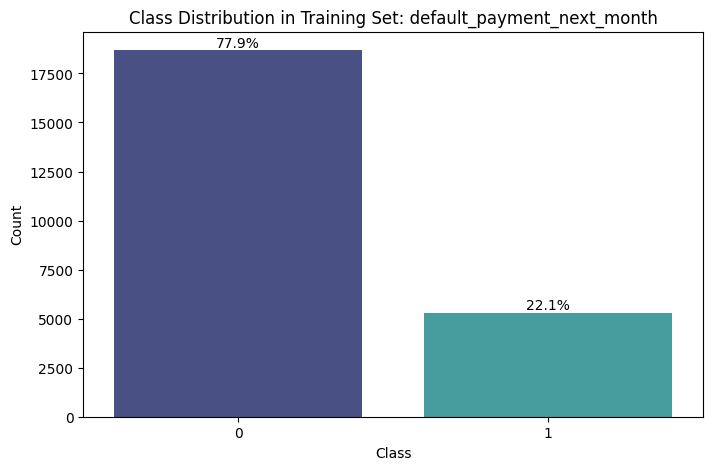

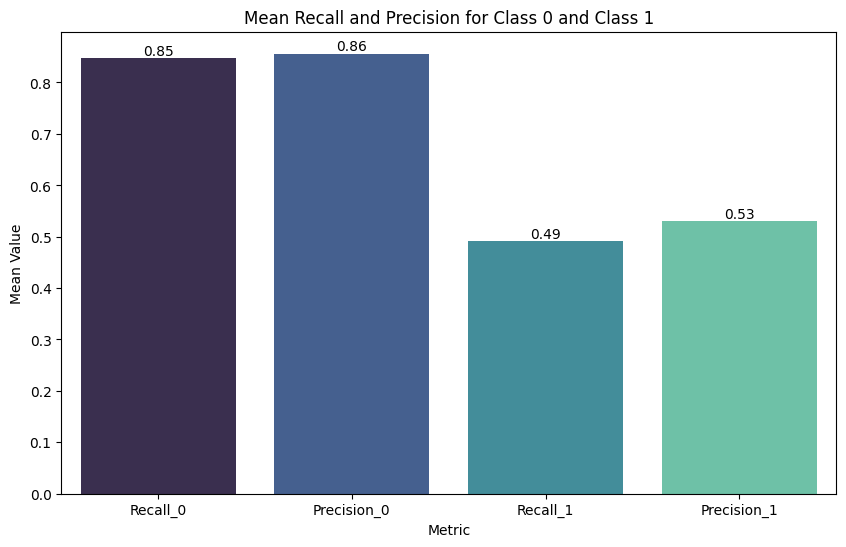

In [5]:
from loan_data_utils import plot_mean_class_metrics
# Load the CSV file into a DataFrame
file_path = '/content/combined_model_metrics_with_resampling.csv'
metrics_df = pd.read_csv(file_path)

# plot metrics
plot_class_distribution(y_train, target)
plot_mean_class_metrics(metrics_df)

### Top Performing Models

In [13]:
# get_top_performers(metrics_df, top_n=3)
from loan_data_utils import get_top_performers, select_and_sort_top_n

columns_to_check = ['Recall_0', 'Precision_0', 'F1_0', 'Recall_1',
                    'Precision_1', 'F1_1', 'F1_Macro', 'Accuracy']
top3_combined_df = select_and_sort_top_n(metrics_df, columns_to_check, n=3)
top3_combined_df

,Model,Experiment,Recall_0,Precision_0,F1_0,Recall_1,Precision_1,F1_1,F1_Macro,Accuracy
0,Logistic Regression,baseline,0.969399,0.818724,0.887713,0.244160,0.693790,0.361204,0.624459,0.809000
1,LGBM,baseline,0.947143,0.840486,0.890633,0.366993,0.663488,0.472586,0.681609,0.818833
2,Random Forest,class_weight_balanced,0.947143,0.835094,0.887597,0.341372,0.647143,0.446966,0.667281,0.813167
3,LGBM (RandomUnderSampler),resampling,0.770383,0.882786,0.822763,0.639789,0.441727,0.522622,0.672693,0.741500
4,HistGradientBoosting (RandomUnderSampler),resampling,0.786433,0.881929,0.831448,0.629239,0.455537,0.528481,0.679964,0.751667
5,Random Forest (RandomUnderSampler),resampling,0.775947,0.880738,0.825028,0.629992,0.443972,0.520872,0.672950,0.743667
6,HistGradientBoosting,baseline,0.942863,0.840198,0.888575,0.368500,0.646825,0.469515,0.679045,0.815833
7,HistGradientBoosting,class_weight_balanced,0.942863,0.840198,0.888575,0.368500,0.646825,0.469515,0.679045,0.815833
8,Logistic Regression (ADASYN),resampling,0.629360,0.869347,0.730139,0.666918,0.338173,0.448783,0.589461,0.637667
9,Logistic Regression (SMOTE),resampling,0.677509,0.867160,0.760692,0.634514,0.358450,0.458107,0.609399,0.668000


### Load Optimal Models and Params

In [8]:
import json

def load_params(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

best_params = load_params('/content/optimal_model_params.json')

def pretty_print_params(file_path):
    with open(file_path, 'r') as f:
        top_model_params = json.load(f)

    for category, models in top_model_params.items():
        print(f"Category: {category}")
        for model_name, params in models.items():
            print(f"  Model: {model_name}")
            print(f"    Best Params:")
            for param, value in params['best_params'].items():
                print(f"      {param}: {value}")
            if 'best_threshold' in params:
                print(f"    Best Threshold: {params['best_threshold']}")

# Example usage
pretty_print_params('/content/optimal_model_params.json')


Category: Class 1 Recall
  Model: Logistic Regression (ADASYN)
    Best Params:
      C: 6.7
      solver: liblinear
    Best Threshold: 0.2
  Model: Logistic Regression (SMOTE)
    Best Params:
      C: 10.0
      solver: liblinear
    Best Threshold: 0.2
  Model: LGBM (SMOTE)
    Best Params:
      learning_rate: 0.2
      n_estimators: 300
      num_leaves: 31
    Best Threshold: 0.1
Category: Class 1 Precision
  Model: Logistic Regression (baseline)
    Best Params:
      C: 10.0
      penalty: l2
      solver: liblinear
    Best Threshold: 0.5
  Model: LGBM (baseline)
    Best Params:
      learning_rate: 0.01
      n_estimators: 100
      num_leaves: 70
    Best Threshold: 0.5
  Model: Random Forest (class_weight_balanced)
    Best Params:
      max_depth: None
      min_samples_split: 2
      n_estimators: 100
    Best Threshold: 0.5
Category: Class 0 Recall
  Model: Logistic Regression (baseline)
    Best Params:
      C: 0.01
      solver: liblinear
    Best Threshold: 0.1
  M

### Define Models

In [14]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import HistGradientBoostingClassifier

# Define models with their respective preprocessing and resampling steps
models = {
    "Logistic Regression (ADASYN)": ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', ADASYN()),
        ('classifier', LogisticRegression(random_state=42, **best_params['Class 1 Recall']['Logistic Regression (ADASYN)']['best_params']))
    ]),
    "Logistic Regression (SMOTE)": ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', SMOTE()),
        ('classifier', LogisticRegression(random_state=42, **best_params['Class 1 Recall']['Logistic Regression (SMOTE)']['best_params']))
    ]),
    "LGBM (SMOTE)": ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', SMOTE()),
        ('classifier', LGBMClassifier(random_state=42, **best_params['Class 1 Recall']['LGBM (SMOTE)']['best_params'], force_row_wise=True))
    ]),
    "Logistic Regression (baseline)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, **best_params['Class 1 Precision']['Logistic Regression (baseline)']['best_params']))
    ]),
    "LGBM (baseline)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier(random_state=42, **best_params['Class 1 Precision']['LGBM (baseline)']['best_params'], force_row_wise=True))
    ]),
    "Random Forest (class_weight_balanced)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', **best_params['Class 1 Precision']['Random Forest (class_weight_balanced)']['best_params']))
    ]),
    "Logistic Regression (baseline for Class 0 Recall)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, **best_params['Class 0 Recall']['Logistic Regression (baseline)']['best_params']))
    ]),
    "LGBM (baseline for Class 0 Recall)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier(random_state=42, **best_params['Class 0 Recall']['LGBM (baseline)']['best_params'], force_row_wise=True))
    ]),
    "Random Forest (class_weight_balanced for Class 0 Recall)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', **best_params['Class 0 Recall']['Random Forest (class_weight_balanced)']['best_params']))
    ]),
    "LGBM (RandomUnderSampler)": ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', RandomUnderSampler()),
        ('classifier', LGBMClassifier(random_state=42, **best_params['Class 0 Precision']['LGBM (RandomUnderSampler)']['best_params'], force_row_wise=True))
    ]),
    "HistGradientBoosting (RandomUnderSampler)": ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', RandomUnderSampler()),
        ('classifier', HistGradientBoostingClassifier(random_state=42, **best_params['Class 0 Precision']['HistGradientBoosting (RandomUnderSampler)']['best_params']))
    ]),
    "Random Forest (RandomUnderSampler)": ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', RandomUnderSampler()),
        ('classifier', RandomForestClassifier(random_state=42, **best_params['Class 0 Precision']['Random Forest (RandomUnderSampler)']['best_params']))
    ])
}


### Create Voting Classifier

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Select top 2 models for each class 0, 1 recall, and precision
voting_models = [
    ('lr_adasyn', models['Logistic Regression (ADASYN)']),
    ('lgbm_smote', models['LGBM (SMOTE)']),
    ('rf_class_weight_balanced', models['Random Forest (class_weight_balanced)']),
    ('lgbm_baseline', models['LGBM (baseline)']),
    ('lr_baseline_class_0_recall', models['Logistic Regression (baseline for Class 0 Recall)']),
    ('lgbm_baseline_class_0_recall', models['LGBM (baseline for Class 0 Recall)']),
    ('lgbm_randomundersampler', models['LGBM (RandomUnderSampler)']),
    ('rf_randomundersampler', models['Random Forest (RandomUnderSampler)'])
]

# Extract the classifiers from the pipelines
voting_estimators = [(name, pipe.named_steps['classifier']) for name, pipe in voting_models]

# Define the voting classifier
voting_clf = VotingClassifier(estimators=voting_estimators, voting='soft')

# Define the voting pipeline
voting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

# Fit the pipeline
voting_pipeline.fit(X_train, y_train)

# Evaluate and capture metrics for the voting classifier
voting_metrics = evaluate_model(voting_pipeline, X_train, X_test, y_train, y_test, 'Voting Classifier', 'ensemble')

# Print classification report
y_pred = voting_pipeline.predict(X_test)
print("Voting Classifier Classification Report")
print(classification_report(y_test, y_pred))

# Combine metrics with existing DataFrame and save
metrics_list = [voting_metrics]
combined_df = pd.concat([top3_combined_df, pd.DataFrame(metrics_list)], ignore_index=True)
# combined_df.to_csv('optimal_metrics.csv', index=False)

# Display the combined DataFrame
print(combined_df)


[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightG

### Create Stacking Classifier

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Select top 2 models for each class 0, 1 recall, and precision
stacking_estimators = [
    ('lr_adasyn', models['Logistic Regression (ADASYN)'].named_steps['classifier']),
    ('lgbm_smote', models['LGBM (SMOTE)'].named_steps['classifier']),
    ('rf_class_weight_balanced', models['Random Forest (class_weight_balanced)'].named_steps['classifier']),
    ('lgbm_baseline', models['LGBM (baseline)'].named_steps['classifier']),
    ('lr_baseline_class_0_recall', models['Logistic Regression (baseline for Class 0 Recall)'].named_steps['classifier']),
    ('lgbm_baseline_class_0_recall', models['LGBM (baseline for Class 0 Recall)'].named_steps['classifier']),
    ('lgbm_randomundersampler', models['LGBM (RandomUnderSampler)'].named_steps['classifier']),
    ('rf_randomundersampler', models['Random Forest (RandomUnderSampler)'].named_steps['classifier'])
]

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression(random_state=42))

# Define the stacking pipeline
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

# Fit the pipeline
stacking_pipeline.fit(X_train, y_train)

# Evaluate and capture metrics for the stacking classifier
stacking_metrics = evaluate_model(stacking_pipeline, X_train, X_test, y_train, y_test, 'Stacking Classifier', 'ensemble')

# Print classification report
y_pred = stacking_pipeline.predict(X_test)
print("Stacking Classifier Classification Report")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightG

### Combine and Save Final Metrics

In [27]:
# Combine metrics with existing DataFrame and save
metrics_list.append(stacking_metrics)
combined_df = pd.concat([top3_combined_df, pd.DataFrame(metrics_list)], ignore_index=True)
combined_df.to_csv('optimal_metrics.csv', index=False)

# Display the combined DataFrame
combined_df

,Model,Experiment,Recall_0,Precision_0,F1_0,Recall_1,Precision_1,F1_1,F1_Macro,Accuracy
0,Logistic Regression,baseline,0.969399,0.818724,0.887713,0.244160,0.693790,0.361204,0.624459,0.809000
1,LGBM,baseline,0.947143,0.840486,0.890633,0.366993,0.663488,0.472586,0.681609,0.818833
2,Random Forest,class_weight_balanced,0.947143,0.835094,0.887597,0.341372,0.647143,0.446966,0.667281,0.813167
3,LGBM (RandomUnderSampler),resampling,0.770383,0.882786,0.822763,0.639789,0.441727,0.522622,0.672693,0.741500
4,HistGradientBoosting (RandomUnderSampler),resampling,0.786433,0.881929,0.831448,0.629239,0.455537,0.528481,0.679964,0.751667
5,Random Forest (RandomUnderSampler),resampling,0.775947,0.880738,0.825028,0.629992,0.443972,0.520872,0.672950,0.743667
6,HistGradientBoosting,baseline,0.942863,0.840198,0.888575,0.368500,0.646825,0.469515,0.679045,0.815833
7,HistGradientBoosting,class_weight_balanced,0.942863,0.840198,0.888575,0.368500,0.646825,0.469515,0.679045,0.815833
8,Logistic Regression (ADASYN),resampling,0.629360,0.869347,0.730139,0.666918,0.338173,0.448783,0.589461,0.637667
9,Logistic Regression (SMOTE),resampling,0.677509,0.867160,0.760692,0.634514,0.358450,0.458107,0.609399,0.668000




### Performnance Analysis

- **Highest Recall for Class 1**:
  - The highest recall for class 1 among individual models is seen in `Logistic Regression (ADASYN)` with a recall of 0.666918.
  - The voting and stacking classifiers do not outperform the best individual models in terms of class 1 recall. The voting classifier has a recall of 0.335343, and the stacking classifier has a recall of 0.365486.
  
- **Voting Classifier**:
  - Recall_1: 0.335343, which is lower than many individual models.
  - Precision_1: 0.686728, which is high, indicating it performs well in identifying true positives but misses more actual positives.

- **Stacking Classifier**:
  - Recall_1: 0.365486, which is better than the voting classifier but still lower than the top individual models.
  - Precision_1: 0.668966, indicating a good balance but not the best for recall.

- **Balanced Performance**:
  - The `LGBM (RandomUnderSampler)` model strikes a balance with a high recall of 0.639789 and a reasonable precision of 0.441727.

### Recommendations:
- **Class 1 Recall Focus**: For a primary focus on class 1 recall, individual models such as `Logistic Regression (ADASYN)` and `LGBM (RandomUnderSampler)` outperform the ensemble methods in recall for class 1.
- **Ensemble Methods**: The ensemble methods show balanced performance but do not achieve the highest recall for class 1. They may be useful when considering overall model performance, including precision and recall for both classes.
- **Further Tuning**: Further tuning or adjusting the voting/stacking strategies might be necessary to achieve better performance specifically for class 1 recall.

Overall, while the ensemble methods provide balanced performance, the individual models, particularly those using resampling techniques, show higher recall for class 1, which is crucial for identifying loan defaults.

### Data Utils Script

In [19]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib
import json
import logging
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

#--------   Load and Preprocess Data   --------#

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def clean_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

def rename_columns(df):
    rename_dict = {'pay_0': 'pay_1'}
    df = df.rename(columns=rename_dict)
    return df

def convert_categorical(df, categorical_columns):
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

def split_features_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        df = clean_column_names(df)
        df = remove_id_column(df)
        df = rename_columns(df)
        df = convert_categorical(df, categorical_columns)
        X, y = split_features_target(df, target)
        return X, y
    return None, None

#--------   Plot Class Distribution   --------#


def plot_class_distribution(y_train, target_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='mako')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

def plot_mean_class_metrics(df):
    """
    Function to calculate and plot the mean recall and precision metrics for class 0 and class 1.
    """
    # Calculate the mean of recall and precision for both classes
    metrics_df = pd.DataFrame({
        'Metric': ['Recall_0', 'Precision_0', 'Recall_1', 'Precision_1'],
        'Mean Value': [
            df['Recall_0'].mean(),
            df['Precision_0'].mean(),
            df['Recall_1'].mean(),
            df['Precision_1'].mean()
        ]
    })

    # Plot the mean of recall and precision for each class
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Mean Value', data=metrics_df, palette='mako')
    plt.title('Mean Recall and Precision for Class 0 and Class 1')
    plt.xlabel('Metric')
    plt.ylabel('Mean Value')
    for index, row in metrics_df.iterrows():
        plt.text(index, row['Mean Value'], f'{row["Mean Value"]:.2f}', ha='center', va='bottom')
    plt.show()

#--------   Evaluate and Capture Metrics   --------#

# def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name, experiment_name):
#     logger.info(f"Training and evaluating model: {model_name} ({experiment_name})")

#     # Fit the pipeline
#     pipeline.fit(X_train, y_train)

#     # Make predictions
#     y_pred = pipeline.predict(X_test)

#     # Capture classification report
#     report = classification_report(y_test, y_pred, output_dict=True)

#     # Extract relevant metrics
#     metrics = {
#         'Model': model_name,
#         'Experiment': experiment_name,
#         'Recall_0': report['0']['recall'],
#         'Precision_0': report['0']['precision'],
#         'F1_0': report['0']['f1-score'],
#         'Recall_1': report['1']['recall'],
#         'Precision_1': report['1']['precision'],
#         'F1_1': report['1']['f1-score'],
#         'F1_Macro': report['macro avg']['f1-score'],
#         'Accuracy': report['accuracy']
#     }

#     logger.info(f"Completed evaluation for model: {model_name} ({experiment_name})")
#     return metrics

# Function to evaluate model
def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name, experiment_name):
    logger.info(f"Training and evaluating model: {model_name} ({experiment_name})")

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Capture classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract relevant metrics
    metrics = {
        'Model': model_name,
        'Experiment': experiment_name,
        'Recall_0': report['0']['recall'],
        'Precision_0': report['0']['precision'],
        'F1_0': report['0']['f1-score'],
        'Recall_1': report['1']['recall'],
        'Precision_1': report['1']['precision'],
        'F1_1': report['1']['f1-score'],
        'F1_Macro': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }
    return metrics

def compile_metrics(metrics_list, experiment_name='experiment_name'):
    metrics_df = pd.DataFrame(metrics_list)
    csv_filename = f'{experiment_name}_metrics.csv'
    metrics_df.to_csv(csv_filename, index=False)
    logger.info(f"Metrics saved to {csv_filename}")
    return metrics_df


def clean_params(params):
    """
    Clean the model parameters by removing the 'classifier__' prefix.
    """
    return {key.replace('classifier__', ''): value for key, value in params.items()}

# --------   Get Top Performers   --------#

import pandas as pd
def get_top_performers(metrics_df, top_n=3):
    metrics = ['Recall_0', 'Precision_0', 'Recall_1', 'Precision_1']
    top_performers = []

    for metric in metrics:
        sorted_df = metrics_df[['Experiment', 'Model', metric]].sort_values(by=metric, ascending=False).head(top_n)
        sorted_df['Metric'] = metric
        sorted_df = sorted_df.rename(columns={metric: 'Value'})
        top_performers.append(sorted_df)

    # Concatenate all top performers into a single DataFrame
    top_performers_df = pd.concat(top_performers, ignore_index=True)

    # Save the results to a CSV file
    top_performers_df.to_csv('top_performing_models.csv', index=False)
    return top_performers_df

def select_and_sort_top_n(df, columns, n=3):
    """
    Selects the top n rows based on each specified column and returns a DataFrame with all columns.

    Args:
    df (pd.DataFrame): The input DataFrame.
    columns (list of str): The columns to sort by.
    n (int): The number of top rows to select for each column.

    Returns:
    pd.DataFrame: A DataFrame containing the top n rows for each specified column, without duplicates.
    """
    top_n_combined_df = pd.DataFrame()

    for column in columns:
        top_n = df.nlargest(n, column)
        top_n_combined_df = pd.concat([top_n_combined_df, top_n])

    # Drop duplicates and reset index
    top_n_combined_df = top_n_combined_df.drop_duplicates().reset_index(drop=True)

    return top_n_combined_df

'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *

Script successfully written to loan_data_utils.py
